# Loading libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.deterministic import DeterministicProcess, CalendarFourier

from sklearn.model_selection import train_test_split, cross_val_score, TimeSeriesSplit, GridSearchCV, RandomizedSearchCV, cross_validate
from sklearn.metrics import mean_squared_error, make_scorer, mean_squared_log_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.feature_selection import SelectFromModel
import xgboost as xg


import missingno as msno 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import KMeans, DBSCAN
import xgboost as xg
from sklearn.ensemble import RandomForestRegressor
from prophet import Prophet
from  sklearn.model_selection import train_test_split

from statsmodels.tsa.stattools import adfuller
from numpy import log
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import multiprocessing
from sklearn.model_selection import KFold
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split, cross_val_score, TimeSeriesSplit, GridSearchCV, RandomizedSearchCV, cross_validate






#from sklearn.utils import resample
%matplotlib inline
sns.set_style("darkgrid")
from sklearn.metrics import mean_squared_error

# Importing the dataset

In [2]:
new_df_mesos = pd.read_csv('new_df_mesos.csv')
df_prova = pd.read_csv('df_prova.csv')
df = pd.read_csv('df.csv')

df['month_year'] = pd.to_datetime(df.Dates).dt.to_period('M')
df['Dates'] = pd.to_datetime(df['Date']).dt.date
df['Time'] = pd.to_datetime(df['Date']).dt.time

selected_types = ['CRIMINAL SEXUAL ASSAULT', 'SEX OFFENSE']
descriptions = ['PUBLIC INDECENCY', 'SEXUAL EXPLOITATION OF A CHILD', 
       'INDECENT SOLICITATION/CHILD', 'CRIMINAL TRANSMISSION OF HIV',
       'INDECENT SOLICITATION OF A CHILD', 'FORNICATION', 'BIGAMY',
        'MARRYING A BIGAMIST']
df.Dates = pd.to_datetime(df.Dates)
df_prova = df[(df['Primary Type'] == 'CRIMINAL SEXUAL ASSAULT') | (df['Primary Type'] == 'SEX OFFENSE')]
for description in descriptions:
    df_prova = df_prova[df_prova['Description'] != description]

In [3]:
new_df_mesos = new_df_mesos.set_index('month_year')

In [4]:
new_df_mesos = new_df_mesos.drop(columns = ['agressions_2_month_avg', 'agressions_6_month_avg', 'agressions_lag_1', 'agressions_lag_2', 'trend'])

# Setting main dates

In [5]:
date ={}
date['date_start_train'] = '2001-01-01'
date['date_end_train_mesos'] = '2021-12'

date['date_start_test_mesos'] = '2022-01'
date['date_end_test_mesos'] = '2022-12'

In [6]:
# !pip install gluonts
# !pip install mxnet

In [7]:
%matplotlib inline
import plotly.express as px
import seaborn as sns
import statsmodels.api as sm
import statsmodels.tsa.stattools as sm
from statsmodels.tsa.stattools import kpss ,  adfuller
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import gluonts
from gluonts.dataset.common import ListDataset
from gluonts.dataset.field_names import FieldName

from gluonts.evaluation.backtest import make_evaluation_predictions
from gluonts.mx.model.deepar import DeepAREstimator
from gluonts.mx.distribution.neg_binomial import NegativeBinomialOutput
from gluonts.mx.trainer import Trainer
import matplotlib.pyplot  as plt
import pandas as pd
import matplotlib as mpl

from mxnet import gpu

from gluonts.evaluation import Evaluator


In [8]:
new_df_mesos.keys()

Index(['Agressions', 'New Years', 'agressions_lag_3', 'agressions_lag_4',
       'month', 'primavera', 'estiu', 'tardor', 'hivern', 'year_2002',
       'year_2003', 'year_2004', 'year_2005', 'year_2006', 'year_2007',
       'year_2008', 'year_2009', 'year_2010', 'year_2011', 'year_2012',
       'year_2013', 'year_2014', 'year_2015', 'year_2016', 'year_2017',
       'year_2018', 'year_2019', 'year_2020', 'year_2021', 'year_2022',
       'quarter_2', 'quarter_3', 'quarter_4', 'sin(1,freq=A-DEC)',
       'cos(1,freq=A-DEC)', 'sin(2,freq=A-DEC)', 'cos(2,freq=A-DEC)',
       'sin(3,freq=A-DEC)', 'cos(3,freq=A-DEC)', 'sin(4,freq=A-DEC)',
       'cos(4,freq=A-DEC)', 'sin(5,freq=A-DEC)', 'cos(5,freq=A-DEC)',
       'cos(1,freq=M)', 'sin(1,freq=W-SUN)', 'cos(1,freq=W-SUN)',
       'sin(2,freq=W-SUN)', 'cos(2,freq=W-SUN)', 'sin(3,freq=W-SUN)',
       'cos(3,freq=W-SUN)', 'Poverty', 'Foreign born', 'HS Grads', 'BA Grads'],
      dtype='object')

In [9]:
from sklearn.preprocessing import OrdinalEncoder

def add_header_keys(df, keys, header):
    map_ = {k: header + k for k in keys}
    return df.rename(columns=map_)


def split_dynamic_stat_data(df, keys=None, thresh=0.05):
    if keys is None:
        keys = [k for k in df.keys() if k not in ['Agressions', 'code', 'ds']]
    dynamic = []
    unique_codes = np.unique(df.index)
    limit = int(thresh * len(unique_codes))
    counts = {k: [] for k in keys}
    for k in keys:
        if len(np.unique(new_df_mesos[k])) > limit:
                dynamic.append(k)
                keys.remove(k)
    static = [k for k in keys]

    return dynamic, static



def split_real_categorical_data(df, thresh=0.1, keys=[], isdynamical=True, auto=False):
    """
    To decide if a variable is categorical or not, we can do the following.
    Take the length of all the values in a series and compare it with the unique values of the series.
    If the unique values is less than 10% of the length of the full series, it means that the variable is categorical.
    Else, the variable is dynamic.
    This nemotecnic rule should work pretty good.
    """

    if len(keys) == 0 and auto:
        keys = [k for k in df.keys() if k not in ['Agressions', 'code', 'ds']]
    elif len(keys) == 0:
        return [], []

    if isdynamical:
        """
        this will not work for statical data... but it is the most pure way to do it.
        """
        votes = {k: 0 for k in keys}
        for k in keys:
            if len(df[k]) > 1:
                if len(np.unique(df[k])) < thresh * len(df[k]) or len(np.unique(df[k])) == 1:
                    votes[k] -= 1
                else:
                    votes[k] += 1.5

        categorical = []
        real = []
        for k in votes.keys():
            if votes[k] >= 0:
                real.append(k)
            else:
                categorical.append(k)

    else:
        categorical = []
        for k in keys:
            if len(np.unique(df[k])) < thresh * len(df):
                categorical.append(k)
                keys.remove(k)
        real = keys

    print(f'Real keys before formatting {real}')
    print(f'Categorical keys before formatting {categorical}')
    print()
    for k in real:
        if isinstance(np.array(df[k])[0], str):
            categorical.append(k)
            real.remove(k)
    for k in categorical:
        if isinstance(np.array(df[k])[0], float):
            real.append(k)
            categorical.remove(k)
    print(f'Real keys after formatting {real}')
    print(f'Categorical keys after formatting {categorical}')
    return categorical, real



def split_features(df, thresh=0.1):
    dyn, stat = split_dynamic_stat_data(df)
    dyn_cat, dyn_re = split_real_categorical_data(df, thresh=thresh, keys=dyn)
    stat_cat, stat_re = split_real_categorical_data(df, thresh=thresh, keys=stat)
    return dyn_cat, dyn_re, stat_cat, stat_re

def generate_labelled_exogenous_df(df, one_hot=True, thresh=0.1,ignore_keys = [['Agressions']]):
    df = df.fillna(0)
    dyn_cat, dyn_re, stat_cat, stat_re = split_features(df, thresh=thresh)
    print('Dynamical categorical features:')
    for k in dyn_cat:
        print(k)
    print('\n\n')
    print('Dynamical real features:')
    for k in dyn_re:
        print(k)
    print('\n\n')
    print('Statical categorical features:')
    for k in stat_cat:
        print(k)
    print('\n\n')
    print('Statical real features:')
    for k in stat_re:
        print(k)
    print('\n\n')
    new_df = df.copy()
    new_df = add_header_keys(new_df, dyn_cat, 'dyn_cat_')
    new_df = add_header_keys(new_df, dyn_re, 'dyn_re_')
    new_df = add_header_keys(new_df, stat_cat, 'stat_cat_')
    new_df = add_header_keys(new_df, stat_re, 'stat_re_')

    ordinal_encoder = None

    if one_hot:
        cat_dyn_keys = [k for k in new_df.keys() if 'dyn_cat_' in k]
        for k in cat_dyn_keys:
            tmp = pd.get_dummies(new_df[k], prefix=k)
            for new_k in tmp.keys():
                new_k_re = new_k.replace('dyn_cat_', 'dyn_re_OneHot_')
                new_df[new_k_re] = tmp[new_k].copy()
        new_df = new_df.drop(cat_dyn_keys, axis=1)

        cat_sat_keys = [k for k in new_df.keys() if 'stat_cat_' in k]
        features = new_df[cat_sat_keys].to_numpy()
        ordinal_encoder = OrdinalEncoder().fit(features)
        encoded_features = ordinal_encoder.transform(features)
        for i, k in enumerate(cat_sat_keys):
            new_df[k] = encoded_features[:, i]

    return new_df, ordinal_encoder

In [10]:
dd, encod = generate_labelled_exogenous_df(new_df_mesos, one_hot = False)

Real keys before formatting ['agressions_lag_3']
Categorical keys before formatting ['sin(1,freq=A-DEC)', 'sin(2,freq=A-DEC)', 'sin(3,freq=A-DEC)', 'sin(4,freq=A-DEC)', 'sin(5,freq=A-DEC)']

Real keys after formatting ['agressions_lag_3', 'sin(1,freq=A-DEC)', 'sin(3,freq=A-DEC)', 'sin(5,freq=A-DEC)']
Categorical keys after formatting ['sin(2,freq=A-DEC)', 'sin(4,freq=A-DEC)']
Real keys before formatting ['agressions_lag_4']
Categorical keys before formatting ['New Years', 'month', 'primavera', 'estiu', 'tardor', 'hivern', 'year_2002', 'year_2003', 'year_2004', 'year_2005', 'year_2006', 'year_2007', 'year_2008', 'year_2009', 'year_2010', 'year_2011', 'year_2012', 'year_2013', 'year_2014', 'year_2015', 'year_2016', 'year_2017', 'year_2018', 'year_2019', 'year_2020', 'year_2021', 'year_2022', 'quarter_2', 'quarter_3', 'quarter_4', 'cos(1,freq=A-DEC)', 'cos(2,freq=A-DEC)', 'cos(3,freq=A-DEC)', 'cos(4,freq=A-DEC)', 'cos(5,freq=A-DEC)', 'cos(1,freq=M)', 'sin(1,freq=W-SUN)', 'cos(1,freq=W-SUN

In [11]:
dd

,Agressions,stat_cat_New Years,dyn_re_agressions_lag_3,stat_re_agressions_lag_4,stat_cat_month,stat_cat_primavera,stat_cat_estiu,stat_cat_tardor,stat_cat_hivern,stat_cat_year_2002,...,"stat_re_sin(1,freq=W-SUN)","stat_cat_cos(1,freq=W-SUN)","stat_re_sin(2,freq=W-SUN)","stat_cat_cos(2,freq=W-SUN)","stat_re_sin(3,freq=W-SUN)","stat_cat_cos(3,freq=W-SUN)",stat_re_Poverty,stat_cat_Foreign born,stat_re_HS Grads,stat_cat_BA Grads
month_year,,,,,,,,,,,,,,,,,,,,,
2001-01,322.0,1,0.0,0.0,1,0,0,0,1,0,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.196,0.217,0.718,0.255
2001-02,223.0,0,0.0,0.0,2,0,0,0,1,0,...,0.433884,-0.900969,-0.781831,0.623490,0.974928,-0.222521,0.196,0.217,0.718,0.255
2001-03,264.0,0,0.0,0.0,3,1,0,0,0,0,...,0.433884,-0.900969,-0.781831,0.623490,0.974928,-0.222521,0.196,0.217,0.718,0.255
2001-04,225.0,0,322.0,0.0,4,1,0,0,0,0,...,-0.781831,0.623490,-0.974928,-0.222521,-0.433884,-0.900969,0.196,0.217,0.718,0.255
2001-05,286.0,0,223.0,322.0,5,1,0,0,0,0,...,0.781831,0.623490,0.974928,-0.222521,0.433884,-0.900969,0.196,0.217,0.718,0.255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08,0.0,0,225.0,192.0,8,0,1,0,0,0,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.173,0.202,0.859,0.411
2022-09,0.0,0,204.0,225.0,9,0,0,1,0,0,...,0.433884,-0.900969,-0.781831,0.623490,0.974928,-0.222521,0.173,0.202,0.859,0.411
2022-10,0.0,0,0.0,204.0,10,0,0,1,0,0,...,-0.974928,-0.222521,0.433884,-0.900969,0.781831,0.623490,0.173,0.202,0.859,0.411


In [12]:
cols_dyn_re = dd.columns[dd.columns.str.match(r'dyn_re')]
cols_stat_cat = dd.columns[dd.columns.str.match(r'stat_cat')]
cols_dyn_cat = dd.columns[dd.columns.str.match(r'dyn_cat')]
cols_stat_re = dd.columns[dd.columns.str.match(r'stat_re')]

In [13]:
len(cols_dyn_re),len(cols_stat_cat),len(cols_dyn_cat),len(cols_stat_re)

(4, 38, 2, 9)

In [14]:
cols_dyn_re = cols_dyn_re.tolist() + cols_dyn_cat.tolist()

In [15]:
cols_stat_cat.tolist()

['stat_cat_New Years',
 'stat_cat_month',
 'stat_cat_primavera',
 'stat_cat_estiu',
 'stat_cat_tardor',
 'stat_cat_hivern',
 'stat_cat_year_2002',
 'stat_cat_year_2003',
 'stat_cat_year_2004',
 'stat_cat_year_2005',
 'stat_cat_year_2006',
 'stat_cat_year_2007',
 'stat_cat_year_2008',
 'stat_cat_year_2009',
 'stat_cat_year_2010',
 'stat_cat_year_2011',
 'stat_cat_year_2012',
 'stat_cat_year_2013',
 'stat_cat_year_2014',
 'stat_cat_year_2015',
 'stat_cat_year_2016',
 'stat_cat_year_2017',
 'stat_cat_year_2018',
 'stat_cat_year_2019',
 'stat_cat_year_2020',
 'stat_cat_year_2021',
 'stat_cat_year_2022',
 'stat_cat_quarter_2',
 'stat_cat_quarter_3',
 'stat_cat_quarter_4',
 'stat_cat_cos(2,freq=A-DEC)',
 'stat_cat_cos(4,freq=A-DEC)',
 'stat_cat_cos(1,freq=M)',
 'stat_cat_cos(1,freq=W-SUN)',
 'stat_cat_cos(2,freq=W-SUN)',
 'stat_cat_cos(3,freq=W-SUN)',
 'stat_cat_Foreign born',
 'stat_cat_BA Grads']

In [16]:
cardinality = dd[cols_stat_cat.tolist()].max()+1

In [17]:
cardinality = cardinality.astype(int).tolist()

In [18]:
dd.keys()

Index(['Agressions', 'stat_cat_New Years', 'dyn_re_agressions_lag_3',
       'stat_re_agressions_lag_4', 'stat_cat_month', 'stat_cat_primavera',
       'stat_cat_estiu', 'stat_cat_tardor', 'stat_cat_hivern',
       'stat_cat_year_2002', 'stat_cat_year_2003', 'stat_cat_year_2004',
       'stat_cat_year_2005', 'stat_cat_year_2006', 'stat_cat_year_2007',
       'stat_cat_year_2008', 'stat_cat_year_2009', 'stat_cat_year_2010',
       'stat_cat_year_2011', 'stat_cat_year_2012', 'stat_cat_year_2013',
       'stat_cat_year_2014', 'stat_cat_year_2015', 'stat_cat_year_2016',
       'stat_cat_year_2017', 'stat_cat_year_2018', 'stat_cat_year_2019',
       'stat_cat_year_2020', 'stat_cat_year_2021', 'stat_cat_year_2022',
       'stat_cat_quarter_2', 'stat_cat_quarter_3', 'stat_cat_quarter_4',
       'dyn_re_sin(1,freq=A-DEC)', 'stat_re_cos(1,freq=A-DEC)',
       'dyn_cat_sin(2,freq=A-DEC)', 'stat_cat_cos(2,freq=A-DEC)',
       'dyn_re_sin(3,freq=A-DEC)', 'stat_re_cos(3,freq=A-DEC)',
       'dyn_ca

In [22]:
import mxnet as mx
mx.random.seed(7)
np.random.seed(7)

In [23]:

class DeepAR() : 
    def __init__(self,df) : 

        """ 
        init (self,df) : the constructor of the class

        """
        self.df = df
    
    def prepare_dataset(self,start_index,target_index,target,freq):
        dataset = ListDataset([{"start": start_index, 
                                            "target": self.df[target][start_index:target_index]}], freq = freq)
        return dataset
    
    def prepare_dataset_grouped(self,start_index,target_index,target,freq, dyn_re_list, stat_cat_list, stat_re_list):
        dataset_list = []
        current_dataset = {"start": start_index, 
                                        "target": self.df[target][start_index:target_index]}

        dynre_list = []
        statcat_list = []
        statre_list = []

        for dyn_re in dyn_re_list:
            dynre_list.append(self.df[dyn_re][start_index:target_index])

        for stat_cat in stat_cat_list:
            statcat_list.append(self.df[stat_cat].iloc[0])
            
        for stat_re in stat_re_list:
            statre_list.append(self.df[stat_re].iloc[0])
#             statre_list.append(self.df[start_index:target_index])



        current_dataset[FieldName.FEAT_STATIC_CAT] = statcat_list
        current_dataset[FieldName.FEAT_DYNAMIC_REAL] = dynre_list
        current_dataset[FieldName.FEAT_STATIC_REAL] = statre_list

        dataset_list.append(current_dataset)



        dataset = ListDataset(dataset_list, freq = freq)

        return dataset  


    def prepare_train (self,start_index,target_index,target, freq, dyn_re_list, stat_cat_list, stat_re_list) : 
        self.training_data = self.prepare_dataset_grouped(start_index,target_index,target,freq, dyn_re_list, stat_cat_list, stat_re_list)

    def prepare_test (self,start_index,target_index,target,freq, dyn_re_list, stat_cat_list, stat_re_list) : 

        self.test_data = self.prepare_dataset_grouped(start_index,target_index,target,freq, dyn_re_list, stat_cat_list, stat_re_list)

    def estimator (self,freq,context_length,prediction_length,num_layers,num_cells,cell_type,epochs,cardinality, use_external = True) : 

        """"
        In order to fix the architecture of the estimator .. num_layers , cell_type etc ...

        """

        self.estimator = DeepAREstimator(freq=freq, 
                                context_length=context_length,  
                                prediction_length=prediction_length,
                                num_layers=num_layers,    
                                num_cells=num_cells,
                                cell_type=cell_type,
                                #trainer=Trainer(epochs=epochs,ctx=gpu())) 
                                trainer=Trainer(epochs=epochs),
                                use_feat_dynamic_real=True*use_external,
                                use_feat_static_cat=True*use_external,
                                use_feat_static_real=True*use_external,
                                distr_output = NegativeBinomialOutput(),
                                cardinality = cardinality) 

        self.prediction_length = prediction_length

    def train(self) : 

        """
        to do the fit

        """
        self.predictor = self.estimator.train(training_data=self.training_data)

    def evaluate (self,num_samples=100) : 

        """ 
        to do evaluation task

        """

        forecast_it, ts_it = make_evaluation_predictions(
        dataset=self.test_data,  
        predictor=self.predictor,   
        num_samples=num_samples, 
        )
        self.forecasts = list(forecast_it)
        self.tss =  list(ts_it)


    def plot_prob_forecasts(self, index):

        """
        plot the forecasts

        """
        print('hello')
        prediction_intervals = (80.0, 95.0)
        legend = ["observations", "median prediction"] + [f"{k}% prediction interval" for k in prediction_intervals][::-1]
        fig, ax = plt.subplots(1, 1, figsize=(10, 7))
        self.tss[index].plot(ax=ax) 
        self.forecasts[index].plot(color='g')
        #self.forecasts[index].plot(prediction_intervals=prediction_intervals, color='g')
        plt.grid(which="both")
        plt.legend(legend, loc="upper left")
        plt.show()
         

In [215]:
deepar = DeepAR(dd)
deepar.prepare_train(date['date_start_train'],date['date_end_train_mesos'],'Agressions','d', cols_dyn_re, cols_stat_cat, cols_stat_re)
cardinality = np.array(dd[cols_stat_cat].max()+1)

deepar.estimator(freq = 'd',context_length = 100, prediction_length = 18, num_layers = 2, num_cells = 40,cell_type = "gru",epochs = 50,cardinality = cardinality.tolist())
deepar.train()

date['date_start_test_mesos'] = '2001-01'

deepar.prepare_test(date['date_start_test_mesos'],'2022-06','Agressions','d', cols_dyn_re, cols_stat_cat, cols_stat_re)
deepar.evaluate(num_samples=100)

100%|████████████████████████████████████████████████| 50/50 [00:13<00:00,  3.70it/s, epoch=50/50, avg_epoch_loss=3.85]


In [69]:
def rmsle(y_pred,y):
    return np.sqrt(np.mean((np.log(y+1)-np.log(y_pred+1))**2))

In [244]:
y_pred = deepar.forecasts[0].samples.mean(axis = 0)
y_real = np.array(deepar.tss[0]).reshape(-1)[1:

In [128]:
warnings.filterwarnings("ignore")

In [180]:
f = df_prova.groupby([df['month_year']]).size().to_frame()
f = f.iloc[:-2]
f = f.rename(columns = {0:'Agressions'})
f.index = f.index.astype('string')

In [185]:
f['2001-01':'2022-06']

,Agressions
month_year,
2001-01,322
2001-02,223
2001-03,264
2001-04,225
2001-05,286
...,...
2022-02,183
2022-03,214
2022-04,192


In [173]:
test['Pred'] = y_pred

In [26]:
def sqr_err(y_true, y_pred):
    """

    :param y_true: true values of y
    :param y_pred: predicted values of y
    :return: array of lenght original data containing mean squared error for each predictions
    """
    if len(y_true) != len(y_pred):
        raise IndexError("Mismathced array sizes, you inputted arrays with sizes {} and {}".format(len(y_true),
                                                                                                  len(y_pred)))
    else:
        length = len(y_true)

    sqrerror_out = [(y_pred[i]-y_true[i])**2 for i in range(length)]

    return np.array(sqrerror_out)

In [151]:
test['Mean model'] = test['Agressions'].mean()
test['MAPE'] = np.mean(np.abs((test['Agressions'] - test['Pred'])/test['Agressions']))*100
test['MAPE mean'] = np.mean(np.abs((test['Agressions'] - test['Mean model'])/test['Agressions']))*100
test['SMAPE'] = np.mean(np.abs((test['Pred']-test['Agressions'])/((np.abs(test['Pred']) + np.abs(test['Agressions']))/2)))*100
test['SMAPE mean'] = np.mean(np.abs((test['Mean model'] - test['Agressions'])/((np.abs(test['Pred']) + np.abs(test['Agressions']))/2)))*100
test['MAE'] = np.mean(np.abs(test['Agressions'] - test['Pred']))
test['MAE mean'] = np.mean(np.abs(test['Agressions'] - test['Mean model']))
test['Metrica nomb'] = (test['Agressions'] < test['Pred']).sum()/len(test['Pred'])*100
test['Metrica nomb mean'] = (test['Agressions'] < test['Mean model']).sum()/len(test['Pred'])*100
test['RMSE'] = np.sqrt(mean_squared_error(test['Agressions'], test['Pred']))
test['RMSE mean'] = np.sqrt(mean_squared_error(test['Agressions'], test['Mean model']))
test['MSE'] = sqr_err(test['Agressions'], test['Pred'])
test

,Agressions,Pred,Mean model,MAPE,MAPE mean,SMAPE,SMAPE mean,MAE,MAE mean,Metrica nomb,Metrica nomb mean,RMSE,RMSE mean,MSE
month_year,,,,,,,,,,,,,,
2022-07,229,264.260010,207.333333,6.345131,15.14335,6.217609,15.277099,12.695005,28.555556,50.0,33.333333,16.774765,31.335106,1243.268289
2022-08,234,231.990005,207.333333,6.345131,15.14335,6.217609,15.277099,12.695005,28.555556,50.0,33.333333,16.774765,31.335106,4.040078
2022-09,222,226.240005,207.333333,6.345131,15.14335,6.217609,15.277099,12.695005,28.555556,50.0,33.333333,16.774765,31.335106,17.977647
2022-10,230,221.899994,207.333333,6.345131,15.14335,6.217609,15.277099,12.695005,28.555556,50.0,33.333333,16.774765,31.335106,65.610099
2022-11,177,188.740005,207.333333,6.345131,15.14335,6.217609,15.277099,12.695005,28.555556,50.0,33.333333,16.774765,31.335106,137.827729
2022-12,152,137.179993,207.333333,6.345131,15.14335,6.217609,15.277099,12.695005,28.555556,50.0,33.333333,16.774765,31.335106,219.632617


In [242]:
mesos_total2 = pd.read_csv('mesos_total.csv')
mesos_total2 = mesos_total2.set_index('month_year')

mesos_total2['DeepAR'] = np.nan
mesos_total2['DeepAR'][-6:] = prova_bona['Pred']
mesos_total2

,Agressions,XGBoost,Random Forest,Prophet,Average Model,DeepAR
month_year,,,,,,
2021-01-01,144.0,144.066467,169.899128,210.204746,147.518504,NaN
2021-02-01,147.0,147.380310,169.990550,174.696223,150.385273,NaN
2021-03-01,191.0,187.467178,180.785291,175.935322,185.703174,NaN
2021-04-01,169.0,168.065231,174.049428,179.264551,168.048429,NaN
2021-05-01,208.0,206.835983,215.722886,202.816583,207.368666,NaN
2021-06-01,216.0,213.710007,213.364530,217.976771,213.992790,NaN
2021-07-01,225.0,221.936508,223.167671,228.035290,222.167950,NaN
2021-08-01,207.0,206.635162,218.677587,224.610405,207.981586,NaN
2021-09-01,207.0,206.530655,214.740662,205.510103,208.269732,NaN


In [238]:
y_pred = pd.DataFrame(y_pred)
y_pred.to_csv('train_deepar_mesos')

In [245]:
mesos_total2['DeepAR'][:18] = y_pred
# mesos_total2['DeepAR'][:18] += 90
mesos_total2

,Agressions,XGBoost,Random Forest,Prophet,Average Model,DeepAR
month_year,,,,,,
2021-01-01,144.0,144.066467,169.899128,210.204746,147.518504,166.610001
2021-02-01,147.0,147.380310,169.990550,174.696223,150.385273,143.880005
2021-03-01,191.0,187.467178,180.785291,175.935322,185.703174,163.830002
2021-04-01,169.0,168.065231,174.049428,179.264551,168.048429,180.160004
2021-05-01,208.0,206.835983,215.722886,202.816583,207.368666,190.429993
2021-06-01,216.0,213.710007,213.364530,217.976771,213.992790,175.570007
2021-07-01,225.0,221.936508,223.167671,228.035290,222.167950,214.279999
2021-08-01,207.0,206.635162,218.677587,224.610405,207.981586,225.059998
2021-09-01,207.0,206.530655,214.740662,205.510103,208.269732,219.800003


In [253]:
mesos_total2.index = pd.to_datetime(mesos_total2.index)

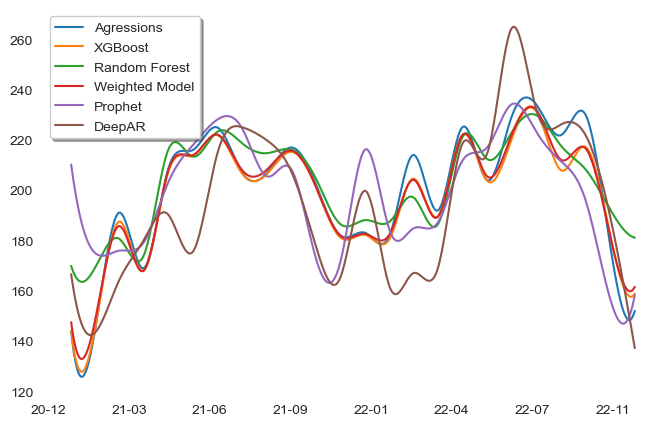

In [255]:
from scipy.interpolate import make_interp_spline
from matplotlib import pyplot as plt, dates

plt.rcParams['axes.facecolor'] = 'white'

min_date = mpl.dates.date2num(mesos_total2.index.min())
max_date = mpl.dates.date2num(mesos_total2.index.max())
x_new = np.linspace(min_date, max_date, 1000)

a_BSpline = make_interp_spline(mesos_total2.index.map(mpl.dates.date2num), mesos_total2.Agressions)
y_new = a_BSpline(x_new)

a_BSpline2 = make_interp_spline(mesos_total2.index.map(mpl.dates.date2num), mesos_total2.XGBoost)
y_new2 = a_BSpline2(x_new)

a_BSpline3 = make_interp_spline(mesos_total2.index.map(mpl.dates.date2num), mesos_total2['Random Forest'])
y_new3 = a_BSpline3(x_new)

a_BSpline4 = make_interp_spline(mesos_total2.index.map(mpl.dates.date2num), mesos_total2['Average Model'])
y_new4 = a_BSpline4(x_new)

a_BSpline5 = make_interp_spline(mesos_total2.index.map(mpl.dates.date2num), mesos_total2.Prophet)
y_new5 = a_BSpline5(x_new)

a_BSpline6 = make_interp_spline(mesos_total2.index.map(mpl.dates.date2num), mesos_total2.DeepAR)
y_new6 = a_BSpline6(x_new)

fig,ax = plt.subplots(figsize=(8,5))
ax.plot(x_new, y_new)
ax.plot(x_new, y_new2)
ax.plot(x_new, y_new3)
ax.plot(x_new, y_new4)
ax.plot(x_new, y_new5)
ax.plot(x_new, y_new6)
ax.legend(('Agressions', 'XGBoost', 'Random Forest', 'Weighted Model', 'Prophet', 'DeepAR'), loc='upper left', shadow=True)
ax.xaxis.set_major_formatter(dates.DateFormatter('%y-%m'))

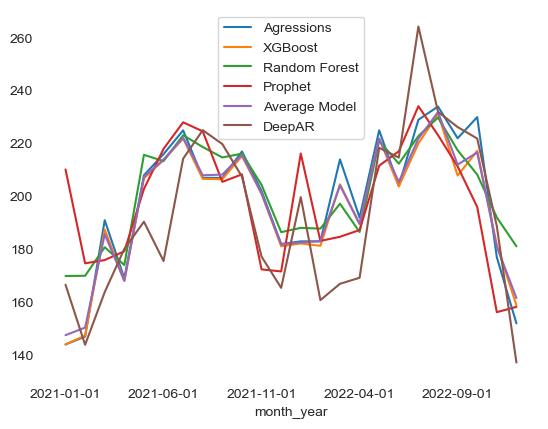

In [246]:
mesos_total2.plot()
plt.show()

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

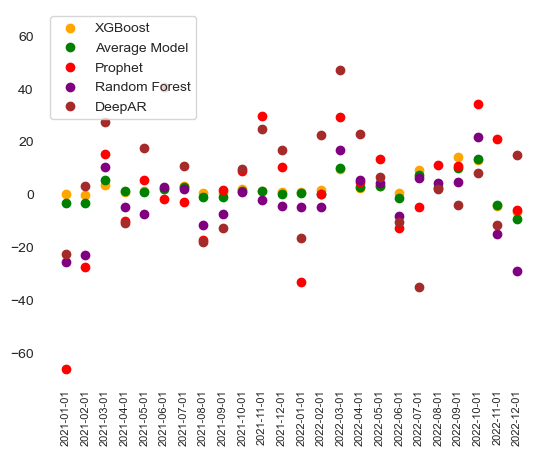

In [251]:
mesos_total2['res_XGBoost'] = mesos_total2['Agressions'] - mesos_total2['XGBoost']
mesos_total2['res_Avg_Model'] = mesos_total2['Agressions'] - mesos_total2['Average Model']
mesos_total2['res_Prophet'] = mesos_total2['Agressions'] - mesos_total2['Prophet']
mesos_total2['res_RF'] = mesos_total2['Agressions'] - mesos_total2['Random Forest']
mesos_total2['res_DeepAR'] = mesos_total2['Agressions'] - mesos_total2['DeepAR']


fig = plt.figure()
ax1 = fig.add_subplot(111)

# ax1.scatter(x[:4], y[:4], s=10, c='b', marker="s", label='first')
ax1.scatter(x=mesos_total2.index, y= mesos_total2['res_XGBoost'], label='XGBoost', color='orange')
ax1.scatter(x=mesos_total2.index, y= mesos_total2['res_Avg_Model'], label='Average Model', color='green')
ax1.scatter(x=mesos_total2.index, y= mesos_total2['res_Prophet'], label='Prophet', color='red')
ax1.scatter(x=mesos_total2.index, y= mesos_total2['res_RF'], label='Random Forest', color='purple')
ax1.scatter(x=mesos_total2.index, y= mesos_total2['res_DeepAR'], label='DeepAR', color='brown')

plt.legend(loc='upper left')
plt.ylim(-70,70)
plt.xticks(fontsize=8, rotation = 90)

In [213]:
mesos_total['DeepAR'][:18] = y_pred
mesos_total['DeepAR'][:18] += 90
mesos_total

,Agressions,XGBoost,Random Forest,Prophet,Average Model,DeepAR
month_year,,,,,,
2021-01-01,154.0,154.066467,179.899128,220.204746,157.518504,221.970001
2021-02-01,157.0,157.380310,179.990550,184.696223,160.385273,206.550003
2021-03-01,201.0,197.467178,190.785291,185.935322,195.703174,222.729996
2021-04-01,179.0,178.065231,184.049428,189.264551,178.048429,223.139999
2021-05-01,218.0,216.835983,225.722886,212.816583,217.368666,245.369995
2021-06-01,226.0,223.710007,223.364530,227.976771,223.992790,229.800003
2021-07-01,235.0,231.936508,233.167671,238.035290,232.167950,229.759995
2021-08-01,217.0,216.635162,228.677587,234.610405,217.981586,242.039993
2021-09-01,217.0,216.530655,224.740662,215.510103,218.269732,211.160004


In [152]:
prova_bona = test

In [153]:
deepar_bona = prova_bona.to_csv('deepar_bona.csv')

In [ ]:
############### Predicció anual ###################3

In [32]:
deepar = DeepAR(dd)
deepar.prepare_train(date['date_start_train'],date['date_end_train_mesos'],'Agressions','d', cols_dyn_re, cols_stat_cat, cols_stat_re)
cardinality = np.array(dd[cols_stat_cat].max()+1)

deepar.estimator(freq = 'd',context_length = 100, prediction_length = 12, num_layers = 2, num_cells = 40,cell_type = "gru",epochs = 50,cardinality = cardinality.tolist())
deepar.train()

date['date_start_test_mesos'] = '2017-01'

deepar.prepare_test(date['date_start_test_mesos'],date['date_end_test_mesos'],'Agressions','d', cols_dyn_re, cols_stat_cat, cols_stat_re)
deepar.evaluate(num_samples=100)

100%|████████████████████████████████████████████████| 50/50 [00:11<00:00,  4.21it/s, epoch=50/50, avg_epoch_loss=3.88]


In [33]:
y_pred = deepar.forecasts[0].samples.mean(axis = 0)
y_real = np.array(deepar.tss[0]).reshape(-1)[1:] #EL primer punt no el prediu! El fa servir com entrada inicial

f = df_prova.groupby([df['month_year']]).size().to_frame()
f = f.iloc[:-2]
f = f.rename(columns = {0:'Agressions'})
f.index = f.index.astype('string')
test = f.iloc[-12:]

test['Pred'] = y_pred

test['Mean model'] = test['Agressions'].mean()
test['MAPE'] = np.mean(np.abs((test['Agressions'] - test['Pred'])/test['Agressions']))*100
test['MAPE mean'] = np.mean(np.abs((test['Agressions'] - test['Mean model'])/test['Agressions']))*100
test['SMAPE'] = np.mean(np.abs((test['Pred']-test['Agressions'])/((np.abs(test['Pred']) + np.abs(test['Agressions']))/2)))*100
test['SMAPE mean'] = np.mean(np.abs((test['Mean model'] - test['Agressions'])/((np.abs(test['Pred']) + np.abs(test['Agressions']))/2)))*100
test['MAE'] = np.mean(np.abs(test['Agressions'] - test['Pred']))
test['MAE mean'] = np.mean(np.abs(test['Agressions'] - test['Mean model']))
test['Metrica nomb'] = (test['Agressions'] < test['Pred']).sum()/len(test['Pred'])*100
test['Metrica nomb mean'] = (test['Agressions'] < test['Mean model']).sum()/len(test['Pred'])*100
test['RMSE'] = np.sqrt(mean_squared_error(test['Agressions'], test['Pred']))
test['RMSE mean'] = np.sqrt(mean_squared_error(test['Agressions'], test['Mean model']))
test['MSE'] = sqr_err(test['Agressions'], test['Pred'])
test

C:\Users\carlo\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\carlo\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\carlo\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

,Agressions,Pred,Mean model,MAPE,MAPE mean,SMAPE,SMAPE mean,MAE,MAE mean,Metrica nomb,Metrica nomb mean,RMSE,RMSE mean,MSE
month_year,,,,,,,,,,,,,,
2022-01,183,224.059998,203.75,25.317981,11.325039,24.301435,10.795468,48.676668,21.958333,33.333333,41.666667,53.093913,25.040384,1685.923400
2022-02,183,140.550003,203.75,25.317981,11.325039,24.301435,10.795468,48.676668,21.958333,33.333333,41.666667,53.093913,25.040384,1802.002241
2022-03,214,176.779999,203.75,25.317981,11.325039,24.301435,10.795468,48.676668,21.958333,33.333333,41.666667,53.093913,25.040384,1385.328491
2022-04,192,155.539993,203.75,25.317981,11.325039,24.301435,10.795468,48.676668,21.958333,33.333333,41.666667,53.093913,25.040384,1329.332090
2022-05,225,188.639999,203.75,25.317981,11.325039,24.301435,10.795468,48.676668,21.958333,33.333333,41.666667,53.093913,25.040384,1322.049644
2022-06,204,169.160004,203.75,25.317981,11.325039,24.301435,10.795468,48.676668,21.958333,33.333333,41.666667,53.093913,25.040384,1213.825345
2022-07,229,201.559998,203.75,25.317981,11.325039,24.301435,10.795468,48.676668,21.958333,33.333333,41.666667,53.093913,25.040384,752.953734
2022-08,234,179.300003,203.75,25.317981,11.325039,24.301435,10.795468,48.676668,21.958333,33.333333,41.666667,53.093913,25.040384,2992.089666
2022-09,222,168.970001,203.75,25.317981,11.325039,24.301435,10.795468,48.676668,21.958333,33.333333,41.666667,53.093913,25.040384,2812.180771


In [ ]:
evaluator = Evaluator(quantiles=[0.1, 0.5, 0.9])
agg_metrics, item_metrics = evaluator(deepar.tss, deepar.forecasts)
agg_metrics